<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/ML_Models/Pi2_Proj_LoanModel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [272]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [273]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [274]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi2_ML/Pi2_Final/Pi2_Loan_Modelling.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [275]:
data.shape

(5000, 14)

#### Observation
- It has a total of 5000 records and 14 columns

In [276]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation
- all data types are in Integer or Float that makes easy for predicting the data and there might not need for any conversation

In [278]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observation
- Income range from 8 to 224k
- Age range is from 23 to 67
  - This proves that by th age 23 the customer should have aleast a degeree education
- Few columns have either 0 to 1 that means its a tes/no type (Personal_Loan, Online, CreditCard)
  - Online mean values is close to 50% and this proves half of the population has online presence

In [279]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


#### Observation
- No NULL value

In [280]:
int(data.duplicated().sum())

0

#### Observation
- No Duplicates

In [281]:
data['ZipCode_Group'] = data['ZIPCode'].astype(str).str[:2].fillna('').map({
      '90': 0,
      '91': 1,
      '92': 2,
      '93': 3,
      '94': 4,
      '95': 5,
      '96': 6
      # Add more mappings for other zip codes as needed
  }).fillna(0)
data.drop('ZIPCode',axis=1,inplace=True)
data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZipCode_Group
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,4
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,4
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,1


#### Observation
- From the above observation there are only 7 county in all from the list of zip codes
- Just to categorize the zip code as counties will make prediction more accurate

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

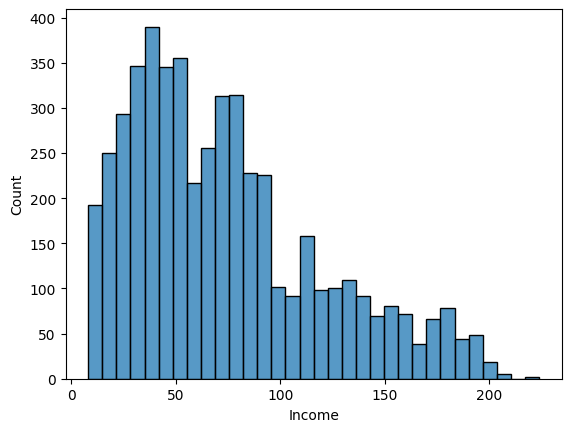

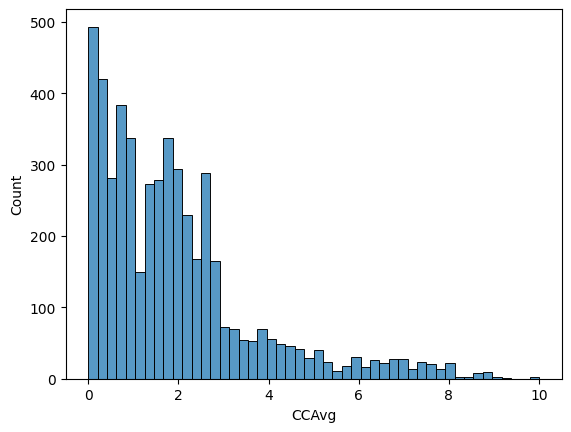

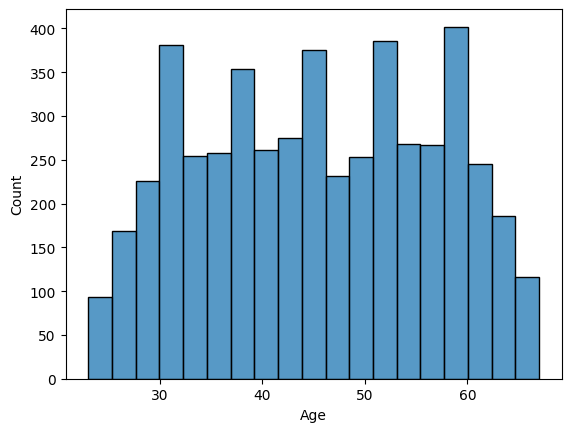

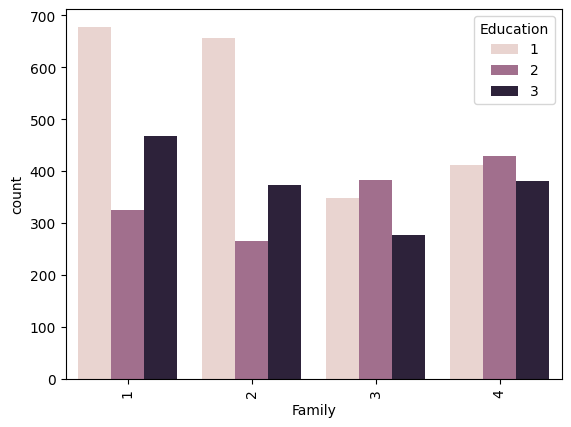

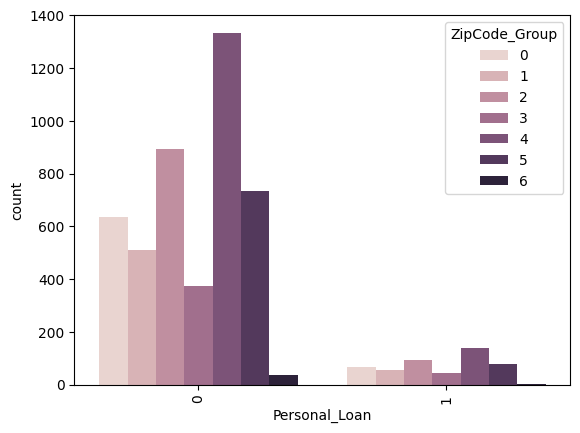

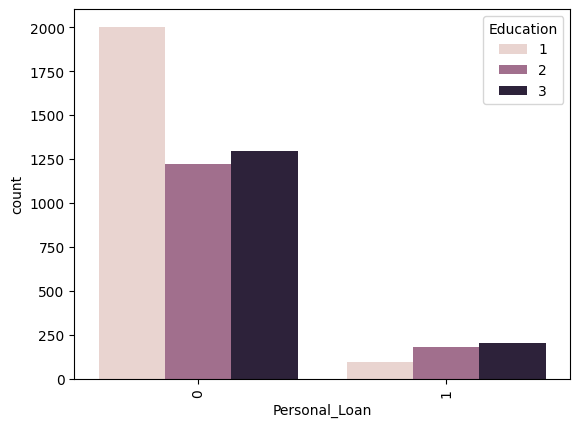

In [282]:
sns.histplot(data=data, x='Income' )
plt.show()
sns.histplot(data=data, x='CCAvg' )
plt.show()
sns.histplot(data=data,x='Age')
plt.show()
sns.countplot(data=data, x='Family', hue='Education');
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=data, x='Personal_Loan', hue='ZipCode_Group');
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=data, x='Personal_Loan', hue='Education');
plt.xticks(rotation=90)
plt.show()

#### Observation
- Income plot infers that it is right skewed
- CCAvg plot infers that most of the avg. amount spent between 0 to 4k
- Age distribution seems to be a normal distribution and this infers that all ages are present in the inout data
- Family Vs. Education
  - Singles family obviously will have single degree but seems there are quite a few dual or triple degree in a single family system
  - 3 per family has a different data as dual degree is slightly higer
  - 4 per family has dual degree is slightly higer
    - but another observation is that 4 family member has more degree than 3 per family
- Personal_Loan Vs. County
  - most people are from the county 4
  - more loans taken is also from county 4
  - least loans taken is from county 6
- Person with adv. degree has taken more loans compared to undergraduate or graduate

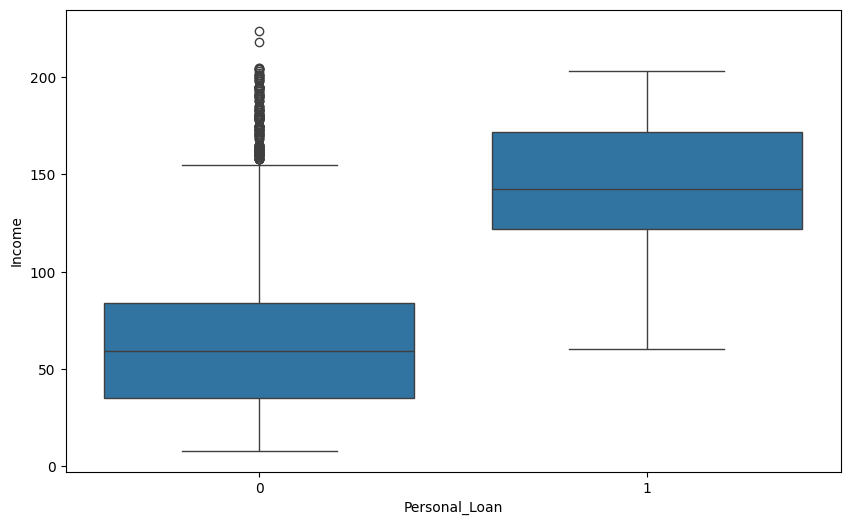

In [283]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Income');

#### Observations
- Median income is greater in customers availing personal loan
- It is obvious that low income people may not take a loan
- But high income non loan takers are huge (outliers) and can be the next target customers for buying a loan

<Figure size 2500x1500 with 0 Axes>

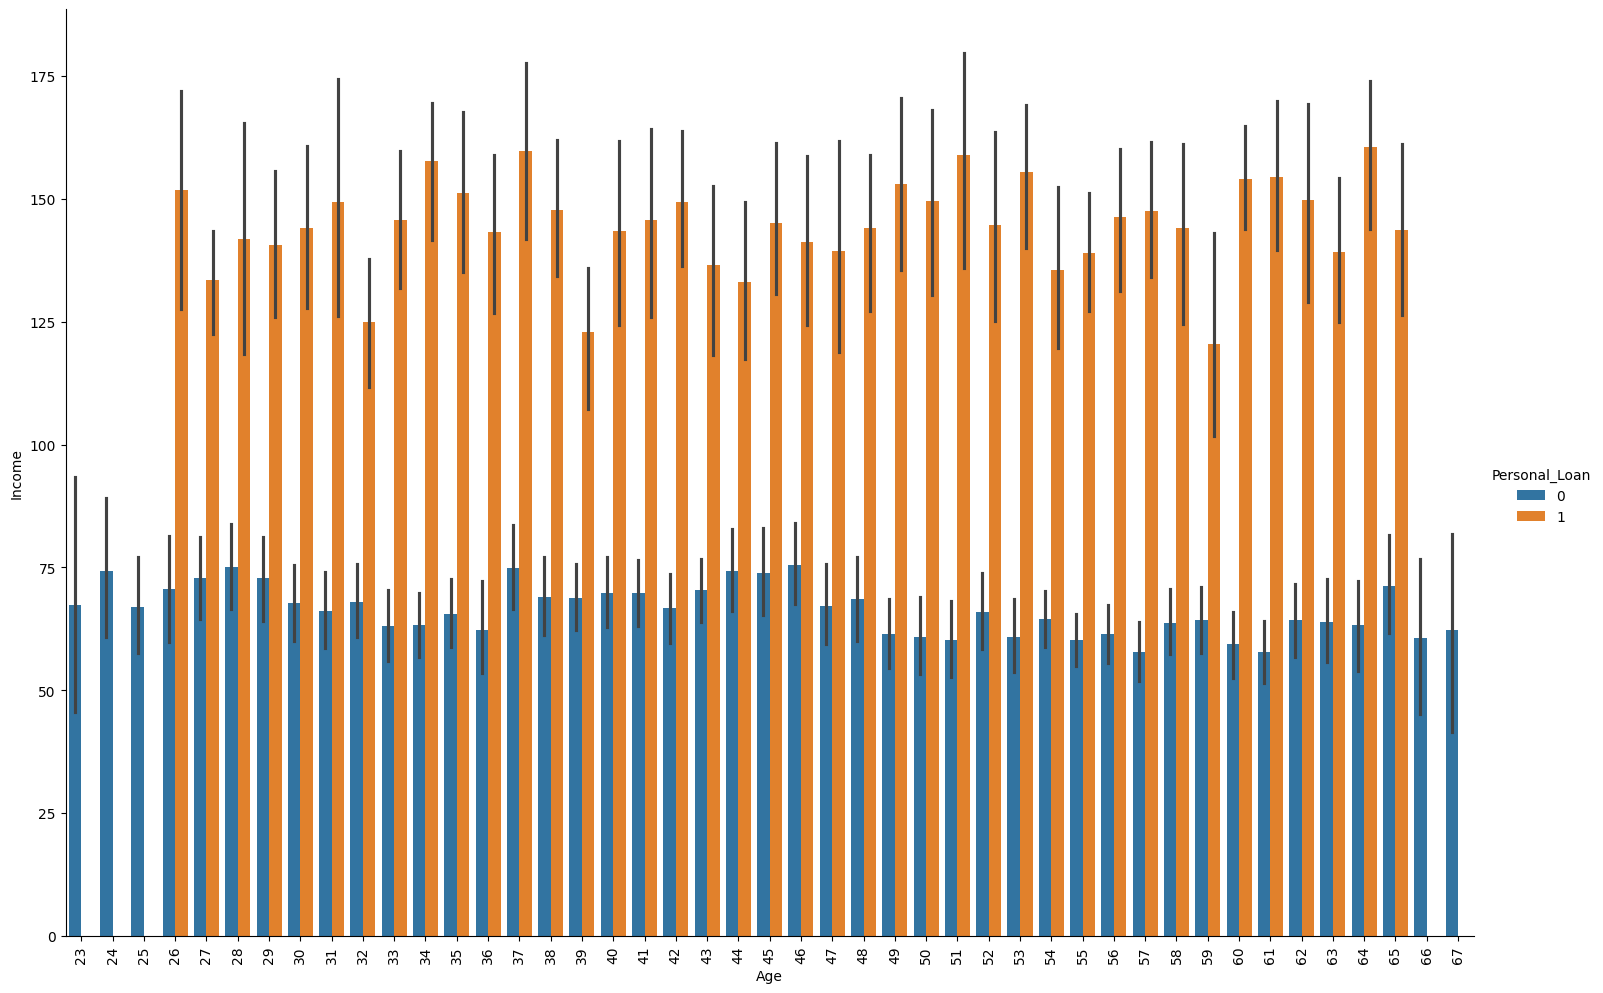

In [284]:
plt.figure(figsize=(25, 15))
sns.catplot(x='Age', y='Income', data=data, kind="bar", hue='Personal_Loan', height=10, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [285]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

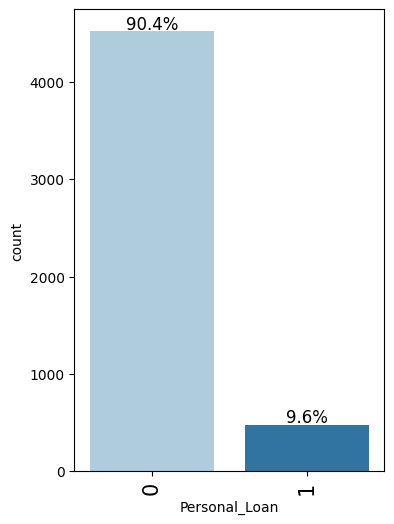

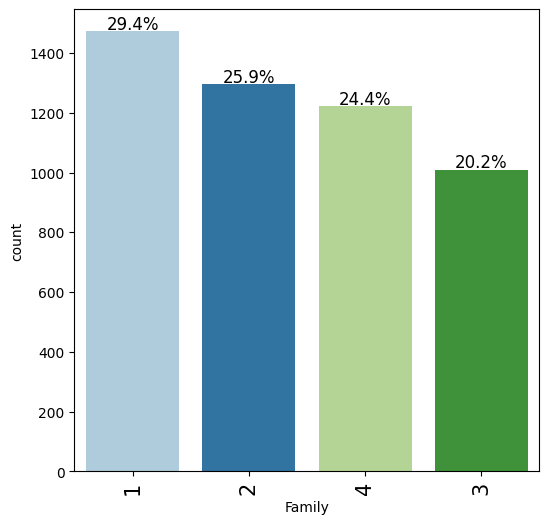

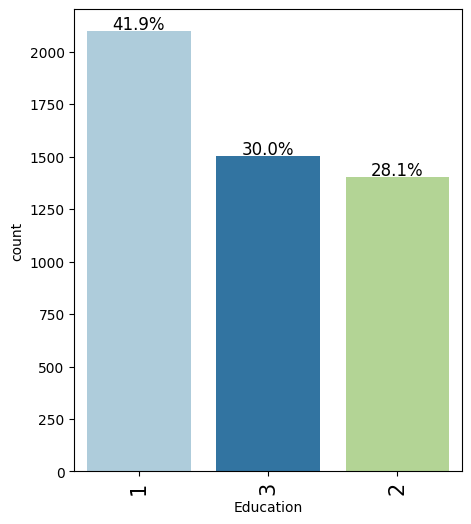

In [286]:
labeled_barplot(data, "Personal_Loan", perc=True)
labeled_barplot(data, "Family", perc=True)
labeled_barplot(data, "Education", perc=True)

#### Observation
- only 9.6% of people from the given input data has taken loan
- Family of 4 is greater than family of 3
- 3 degree (adv. professionals) are greater than dual degrees (graduate)

In [287]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution for " + target + " with Target value = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution for " + target + " with Target value = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

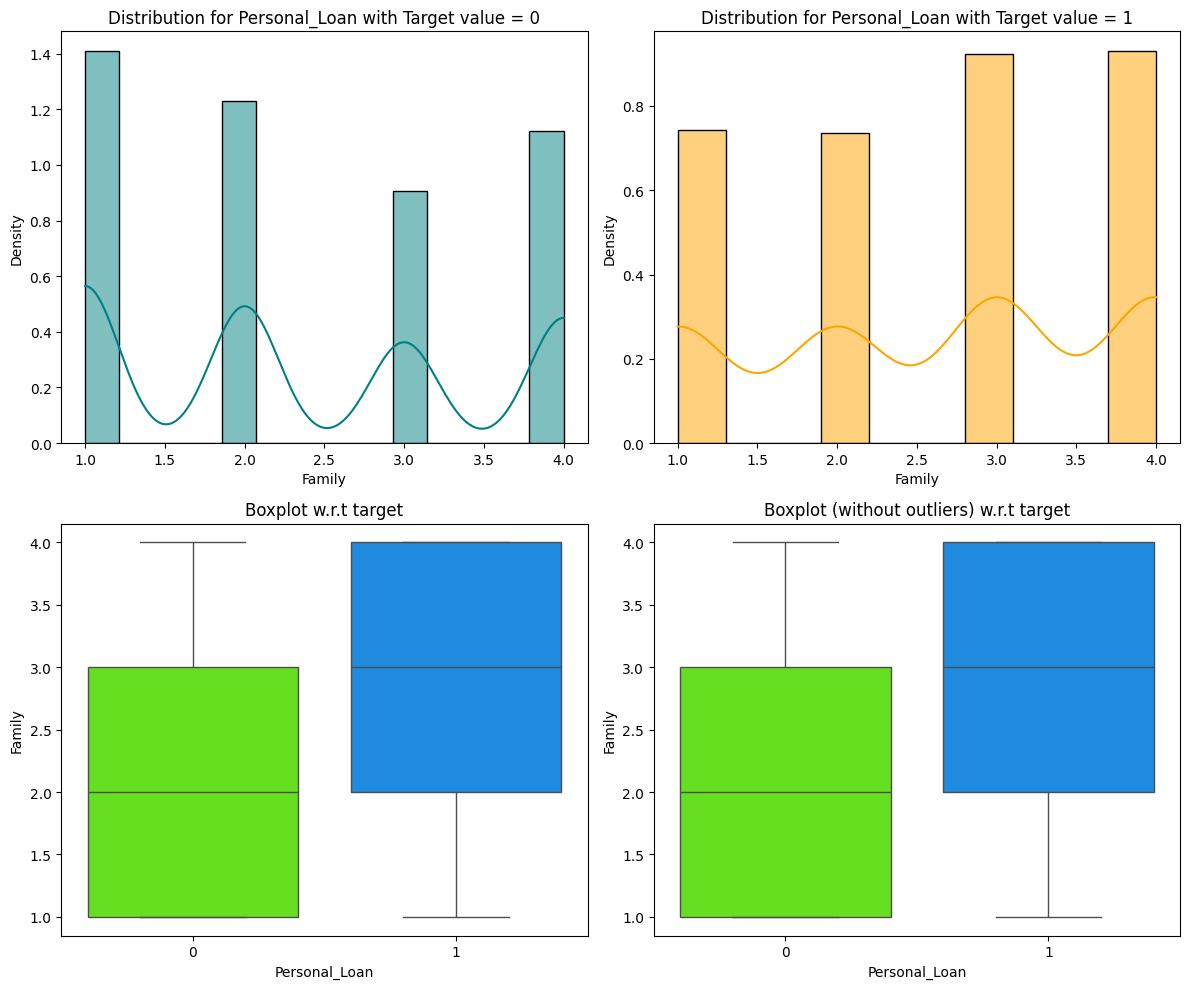

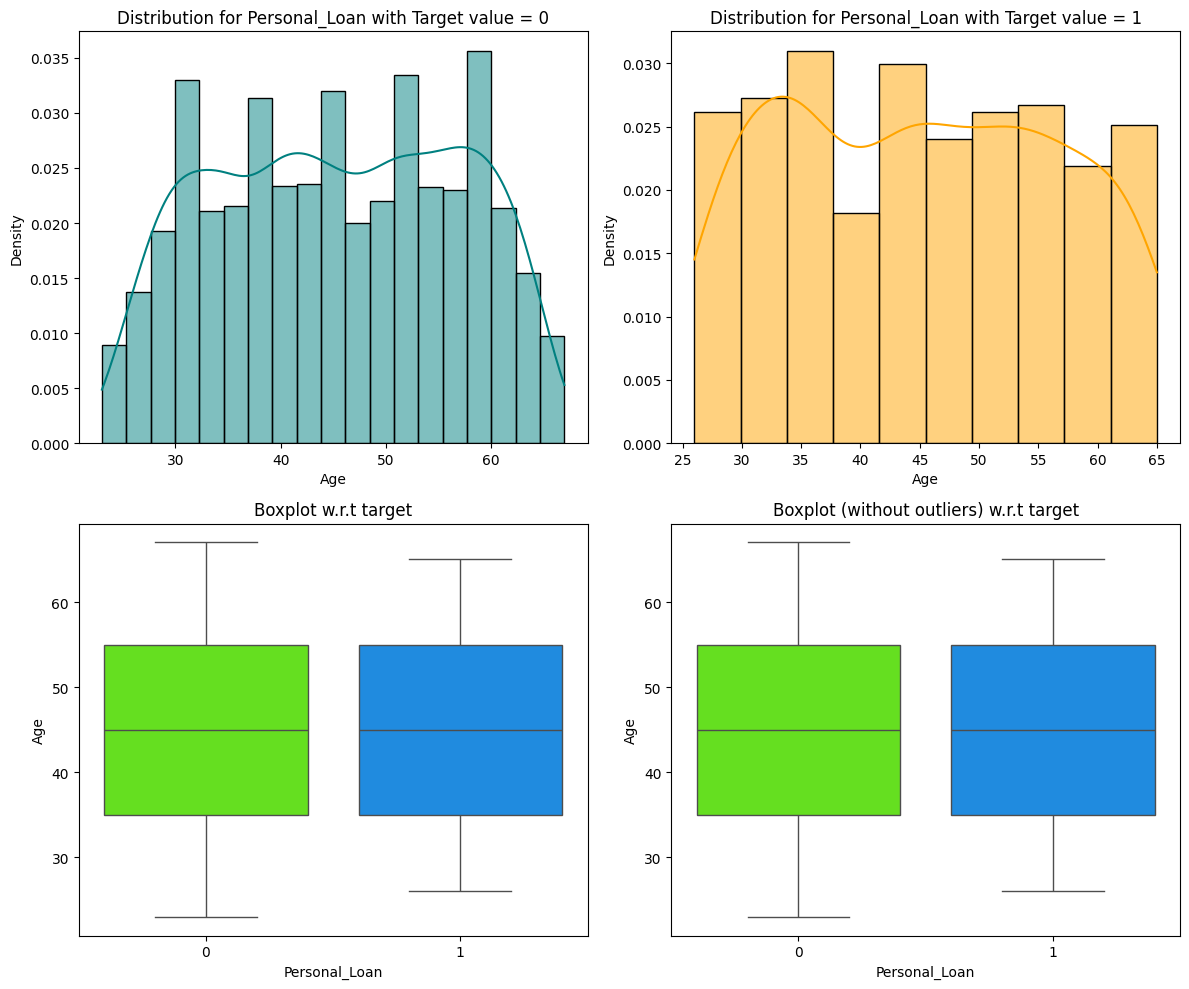

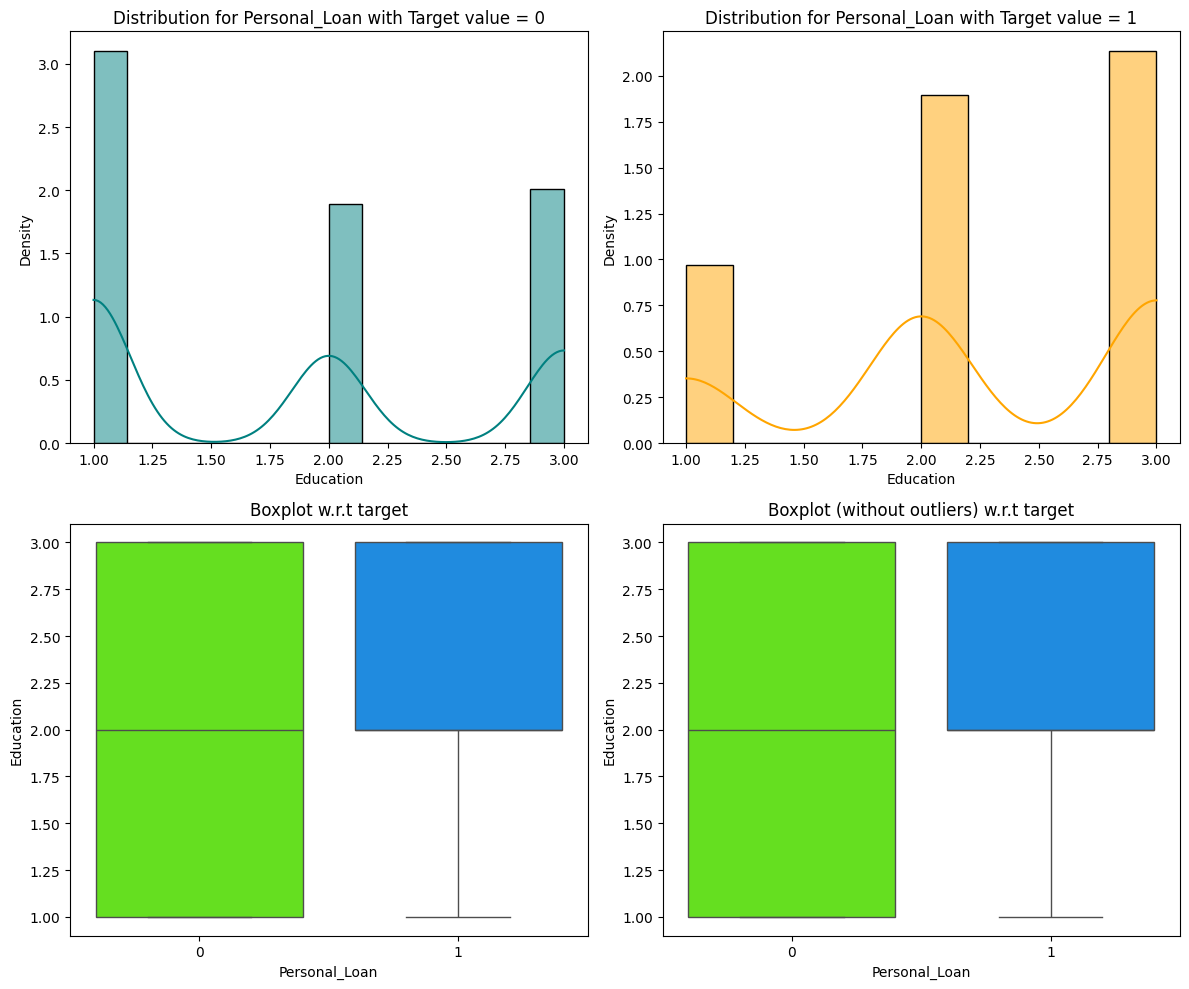

In [288]:
distribution_plot_wrt_target(data, "Family", "Personal_Loan",)
distribution_plot_wrt_target(data, "Age", "Personal_Loan",)
distribution_plot_wrt_target(data, "Education", "Personal_Loan",)

#### Observation
- Outliers are real values and may not be requried to omit
- From the above plots outliers does not change the prediction

#### Questions & Answers



<Axes: xlabel='Mortgage', ylabel='Density'>

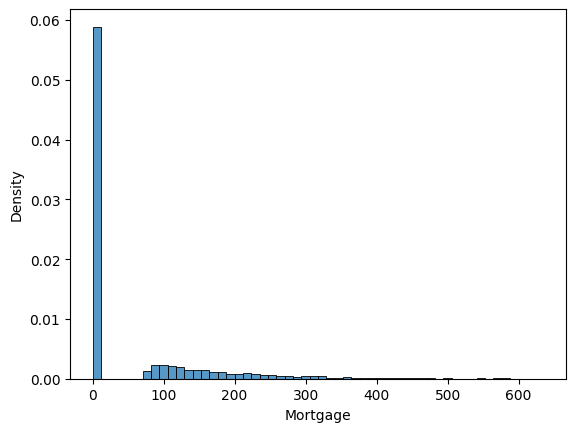

In [289]:
# 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
sns.histplot(data=data,x='Mortgage',stat='density')

<Axes: xlabel='Mortgage'>

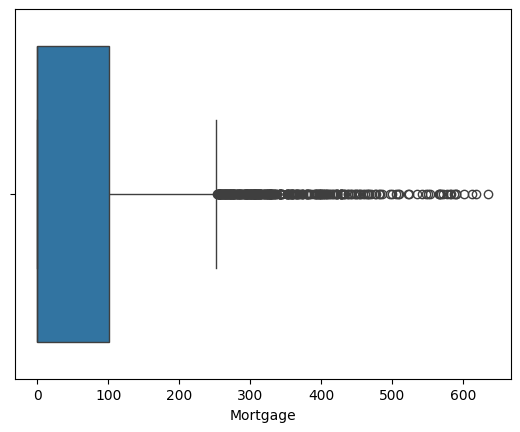

In [290]:
sns.boxplot(data=data,x='Mortgage')

#### Observation
- There are considerable outliers in the above plot for mortage

In [291]:
# 2. How many customers have credit cards?
num_of_credit_card_holders = data['CreditCard']>0
print(num_of_credit_card_holders.sum())
num_of_credit_card_holders.value_counts()

1470


,count
CreditCard,
False,3530
True,1470


#### Observation
- number of Credit Card holders is less than those who do not have

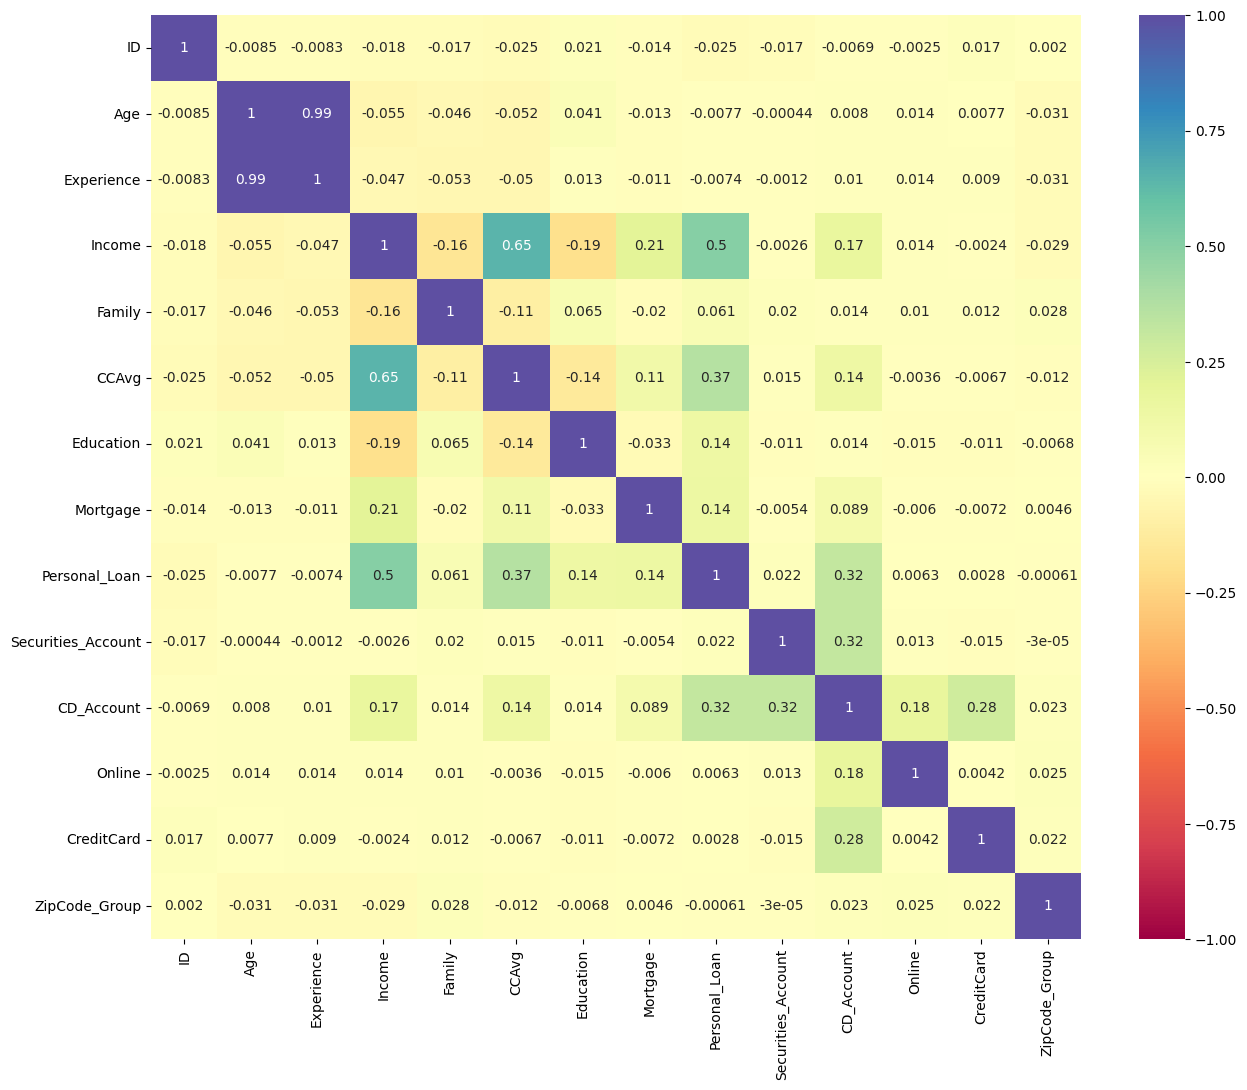

In [292]:
# 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
plt.figure(figsize=(15,12))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observation
- Personal_Loan vs Income has the higest correlation and income can be the candidate to look for
- next to Income is CCAvg and then CD_Account





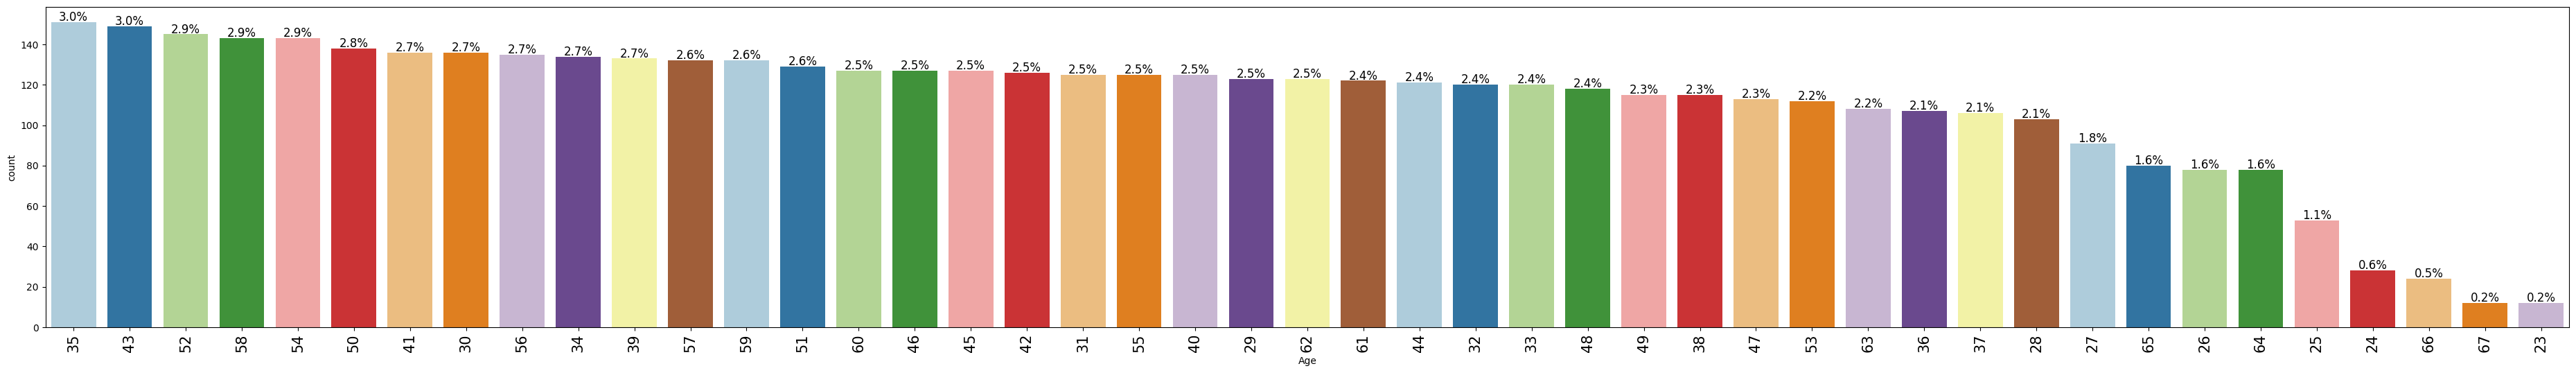

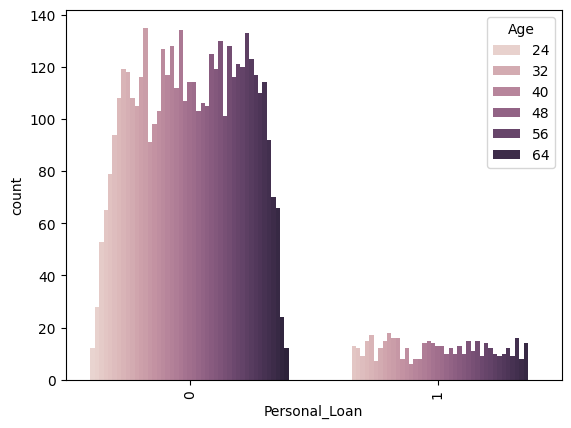

In [293]:
# 4. How does a customer's interest in purchasing a loan vary with their age?
labeled_barplot(data, "Age", perc=True)
sns.countplot(data=data, x='Personal_Loan', hue='Age');
plt.xticks(rotation=90)
plt.show()


#### Observation
- From the above it can be inferred which age has the highest population
- Loan vs. Age seems to be a normal distribution
  - customer in age 25 has taken loan as the same rate as people age 60s
  - small and quick observation is there is a dip at 30-35 age group

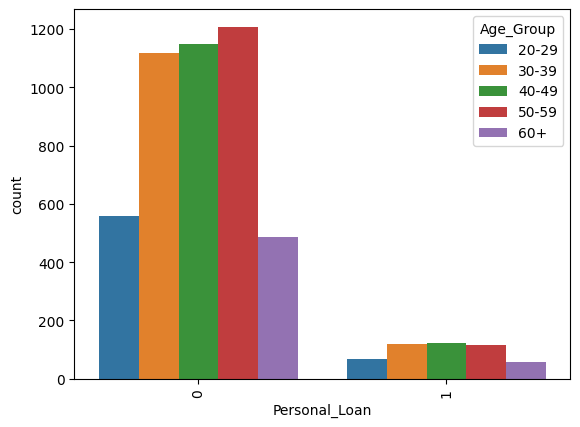

In [294]:
data['Age_Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70],
                             labels=['20-29', '30-39', '40-49', '50-59', '60+'])

# Use Age_Group in the countplot
sns.countplot(data=data, x='Personal_Loan', hue='Age_Group')
plt.xticks(rotation=90)
plt.show()


#### Observation
- Segregating age into groups
- Infers a normal distribution kind of plot
  -  age group from 30-60 have taken more or less the same loans
  - 20 to 20 and 60+ does taken lesser loans compared to other age groups
    - reason could be its alredy 60+ and taking loan can further burden or make be the customer has all that he wanted in life and has not taken loan
    - younger group may have other reasons like they have graduated from universities or college

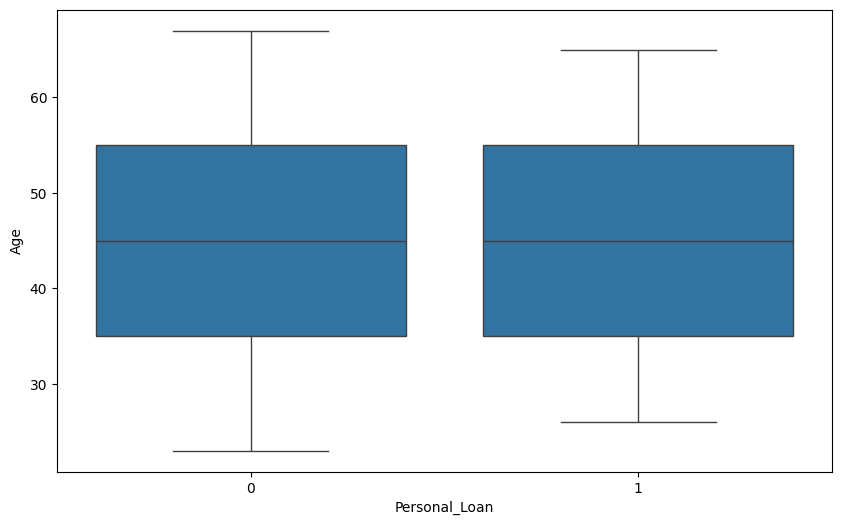

In [295]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Age');

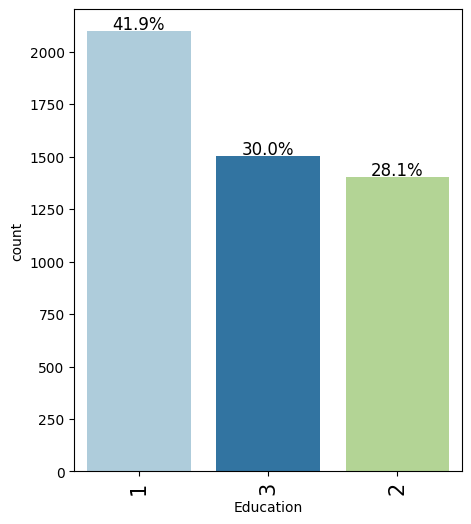

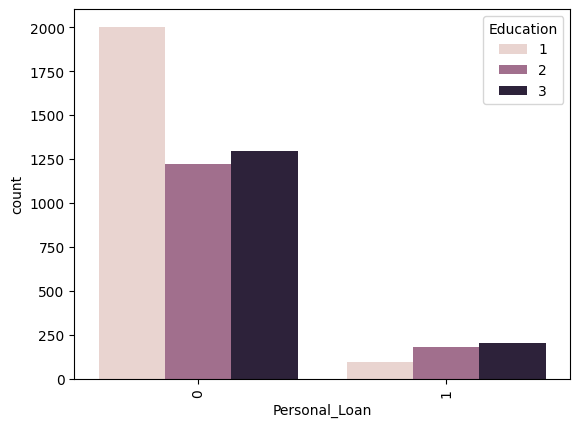

In [296]:
# 5. How does a customer's interest in purchasing a loan vary with their education?
labeled_barplot(data, "Education", perc=True)
sns.countplot(data=data, x='Personal_Loan', hue='Education');
plt.xticks(rotation=90)
plt.show()

#### Observation
- More Educational degreens (adv. degree) tend to take more loans

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [297]:
data.isnull().sum()


,0
ID,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


#### Observation
- No NULL value and the inout data may not require any missing value treatement

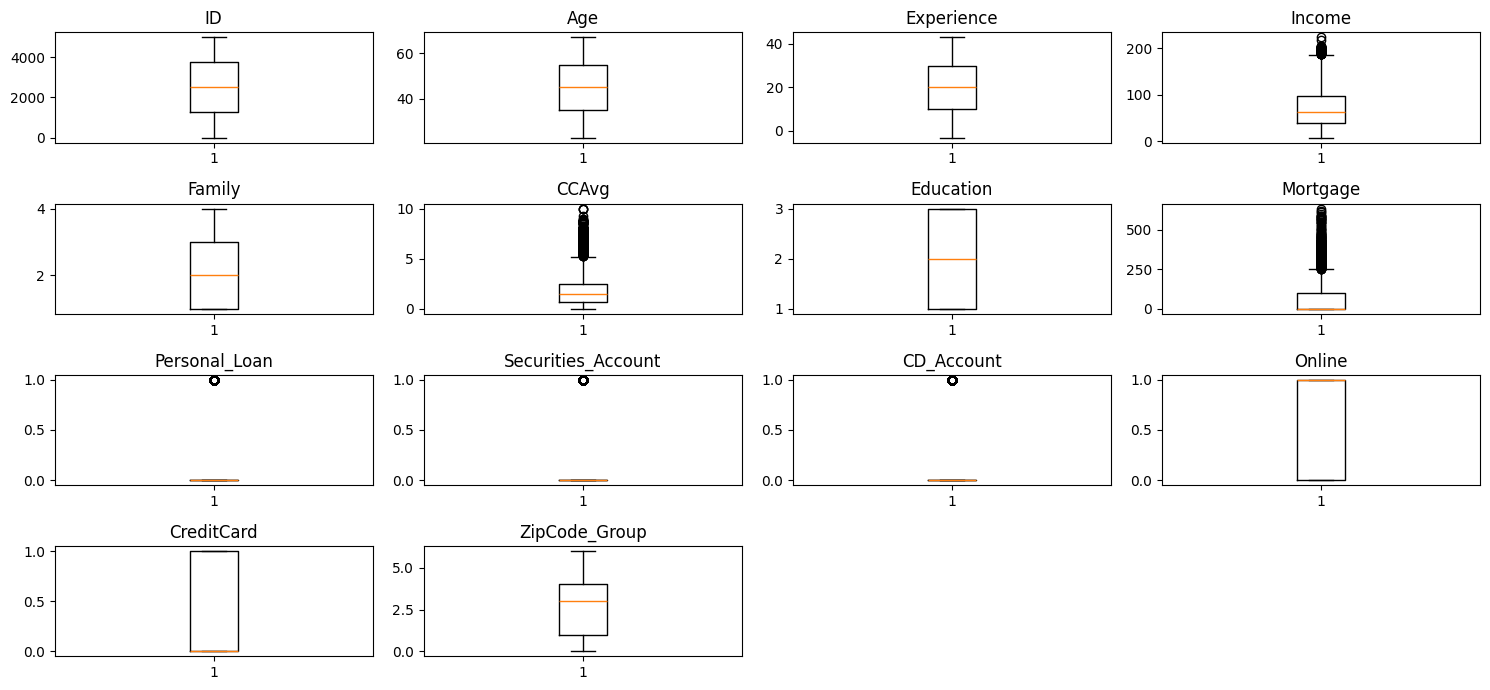

In [298]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
- There are more outliers in Mortage, Income and Securities_Account
- These are real values eventhough its an outlier value but are real value and does not require any treatement on the outliers

In [299]:
data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZipCode_Group,Age_Group
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,1,20-29
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0,40-49
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,4,30-39
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,4,30-39
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,1,30-39


In [300]:
X = data.drop(["Personal_Loan","Age_Group","ID"], axis=1)
y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZipCode_Group
0,25.0,1.0,49.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,45.0,19.0,34.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,39.0,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
3,35.0,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,4.0
4,35.0,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

#### Observation
- Preparing Data
 - Zip code is not grouped from 0 to 6
  - For example zip starts with 91001 will be mapped to zip code group of 1
  - similarly for other zip codes mapped from 0 - 6
- Removed Personal_Loan, Age Group, ID
  - As we are predicting a model to determine Personal Loan and removed it
  - Age_Group was created in the previous code to segregate and removing it
  - ID is for individual customer and may not be used for predicting the model
  - Zip code is now grouped

## Model Building

### Model Evaluation Criterion

## Since the objective is to predict customer buying personal loan and predict the factors involved in making the customer buy personal loan
- For this kind of data prediction Decision Tree would be apt compared to other models
- This data is asking to classify customers to buying a loan than other models like regression or cluster model which cannot classify the given data


### Model Building

In [302]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)#, class_weight="balanced")    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Observation
- Creating decision tree object with class weight as Balanced

In [303]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [304]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

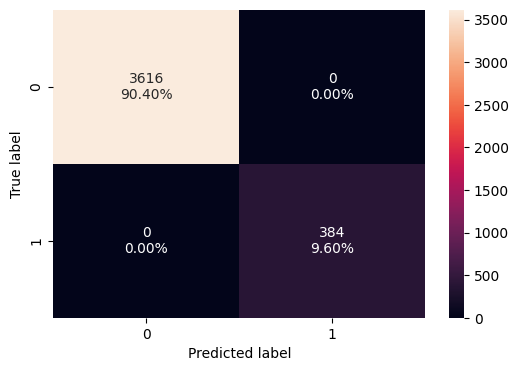

In [305]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [306]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Observation
- As it is known that train data will train on all the possible ways to classify the customer for buying a personal loan and so the F1 is 1.0

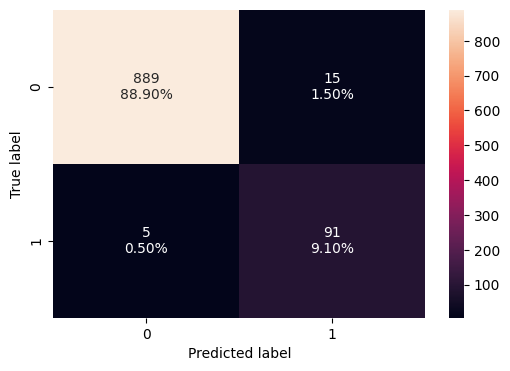

In [307]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [308]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.98,0.947917,0.858491,0.90099


#### Observation
- it can be inferred that test data is producing slightly lower F1 score compared to train data
- F1 score
  - Balanced class weight =
  - Normal weightage = .900

In [309]:
 # list of feature names in X_train
feature_names = list(X_train.columns)

def visualize_dtree(decision_tree):

  # set the figure size for the plot
  plt.figure(figsize=(20, 20))

  # plotting the decision tree
  out = tree.plot_tree(
      decision_tree,                         # decision tree classifier model
      feature_names=feature_names,    # list of feature names (columns) in the dataset
      filled=True,                    # fill the nodes with colors based on class
      fontsize=9,                     # font size for the node text
      node_ids=False,                 # do not show the ID of each node
      class_names=None,               # whether or not to display class names
  )

  # add arrows to the decision tree splits if they are missing
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor("black")    # set arrow color to black
          arrow.set_linewidth(1)          # set arrow linewidth to 1

  # displaying the plot
  plt.show()

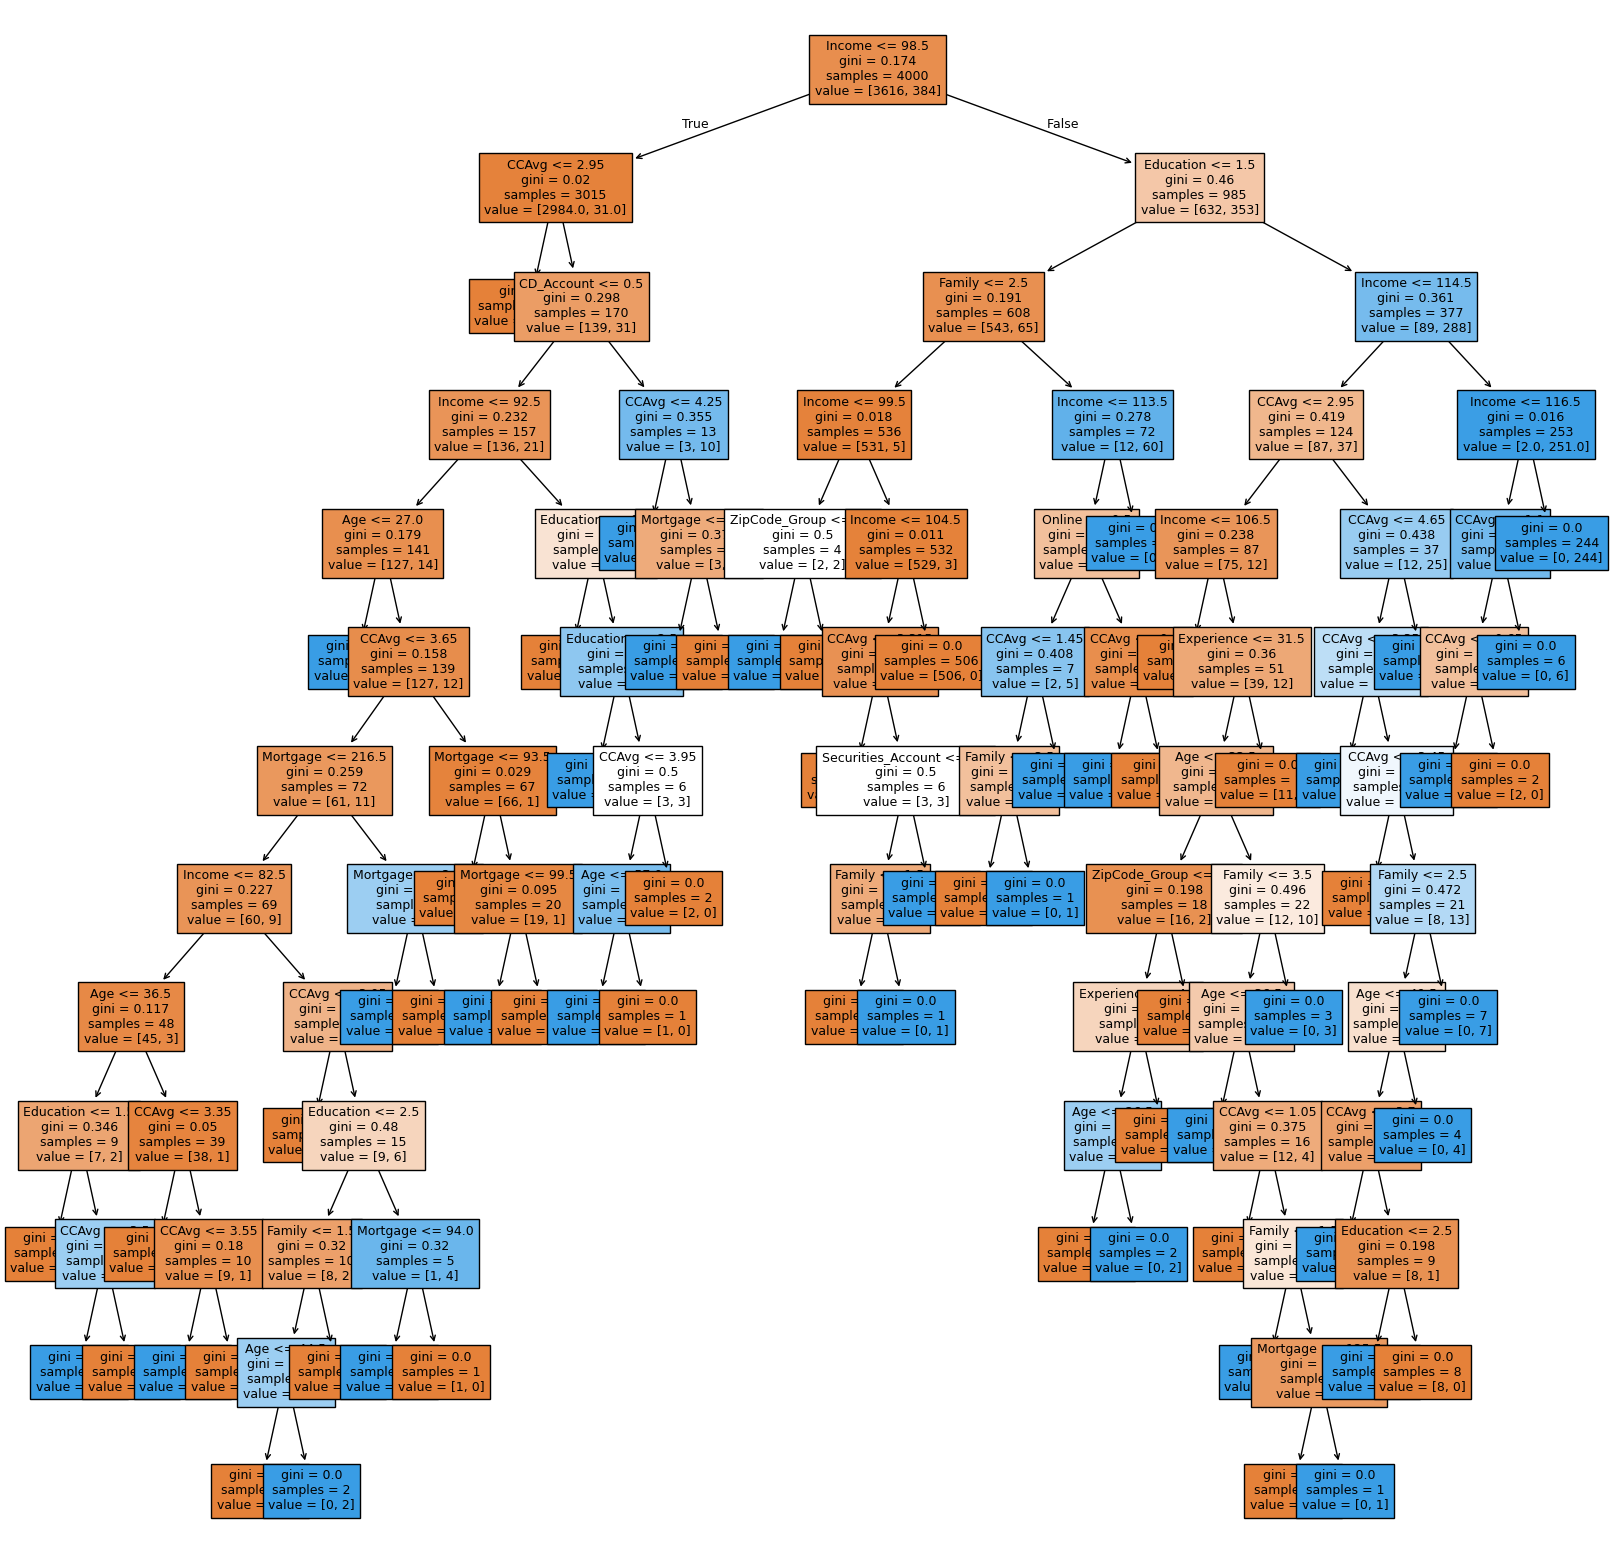

In [310]:
visualize_dtree(dtree1)

#### Observation
- Above infers on the complex decision tree without pruning
- Lets try model improvment using pre and post pruning

## Model Performance Improvement

### Decision Tree (Pre-pruning)

In [311]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42,
                #class_weight='balanced'
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

#### Observation
- Max Depth is defined to increment iof 2 [2,4,6,8,10]
- min_sample_split should split a leaf if the sample is greater han [10,20,30,40,50]
- similaly max-leaf-node will infer about how many leaf should be present in the tree and values include [10,20,30,40,50]
- with all above hyperparameter the pruning is done to determine the best F1 score
- Also Recall will also be required to measure if a customer should not be missed even though the customer is positive

In [312]:

# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=np.int64(30),
                       min_samples_split=np.int64(10), random_state=42)

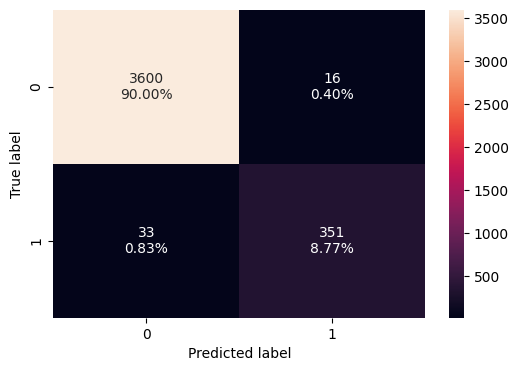

In [313]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [314]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.98775,0.914062,0.956403,0.934754


#### Observation
- From the best esimator value a decision tree is carved out of train data and
- F1 score
  - balanced weightage =
  - normal weightage = .934

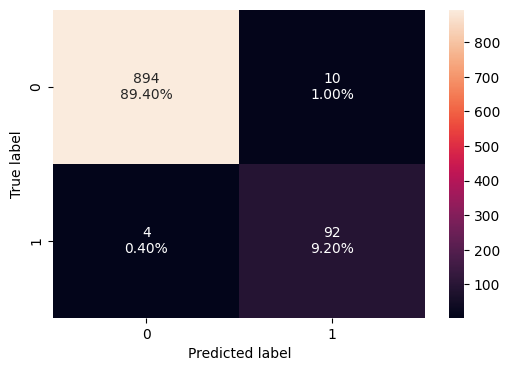

In [315]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [316]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.958333,0.901961,0.929293


#### Observation
- When comparing F1 scores the train and test data seem to be almost equal
- But when comparing Recall the test data is slightly higer
- F1 score
  - Balanced weightage =
  - Normal weightage = .929

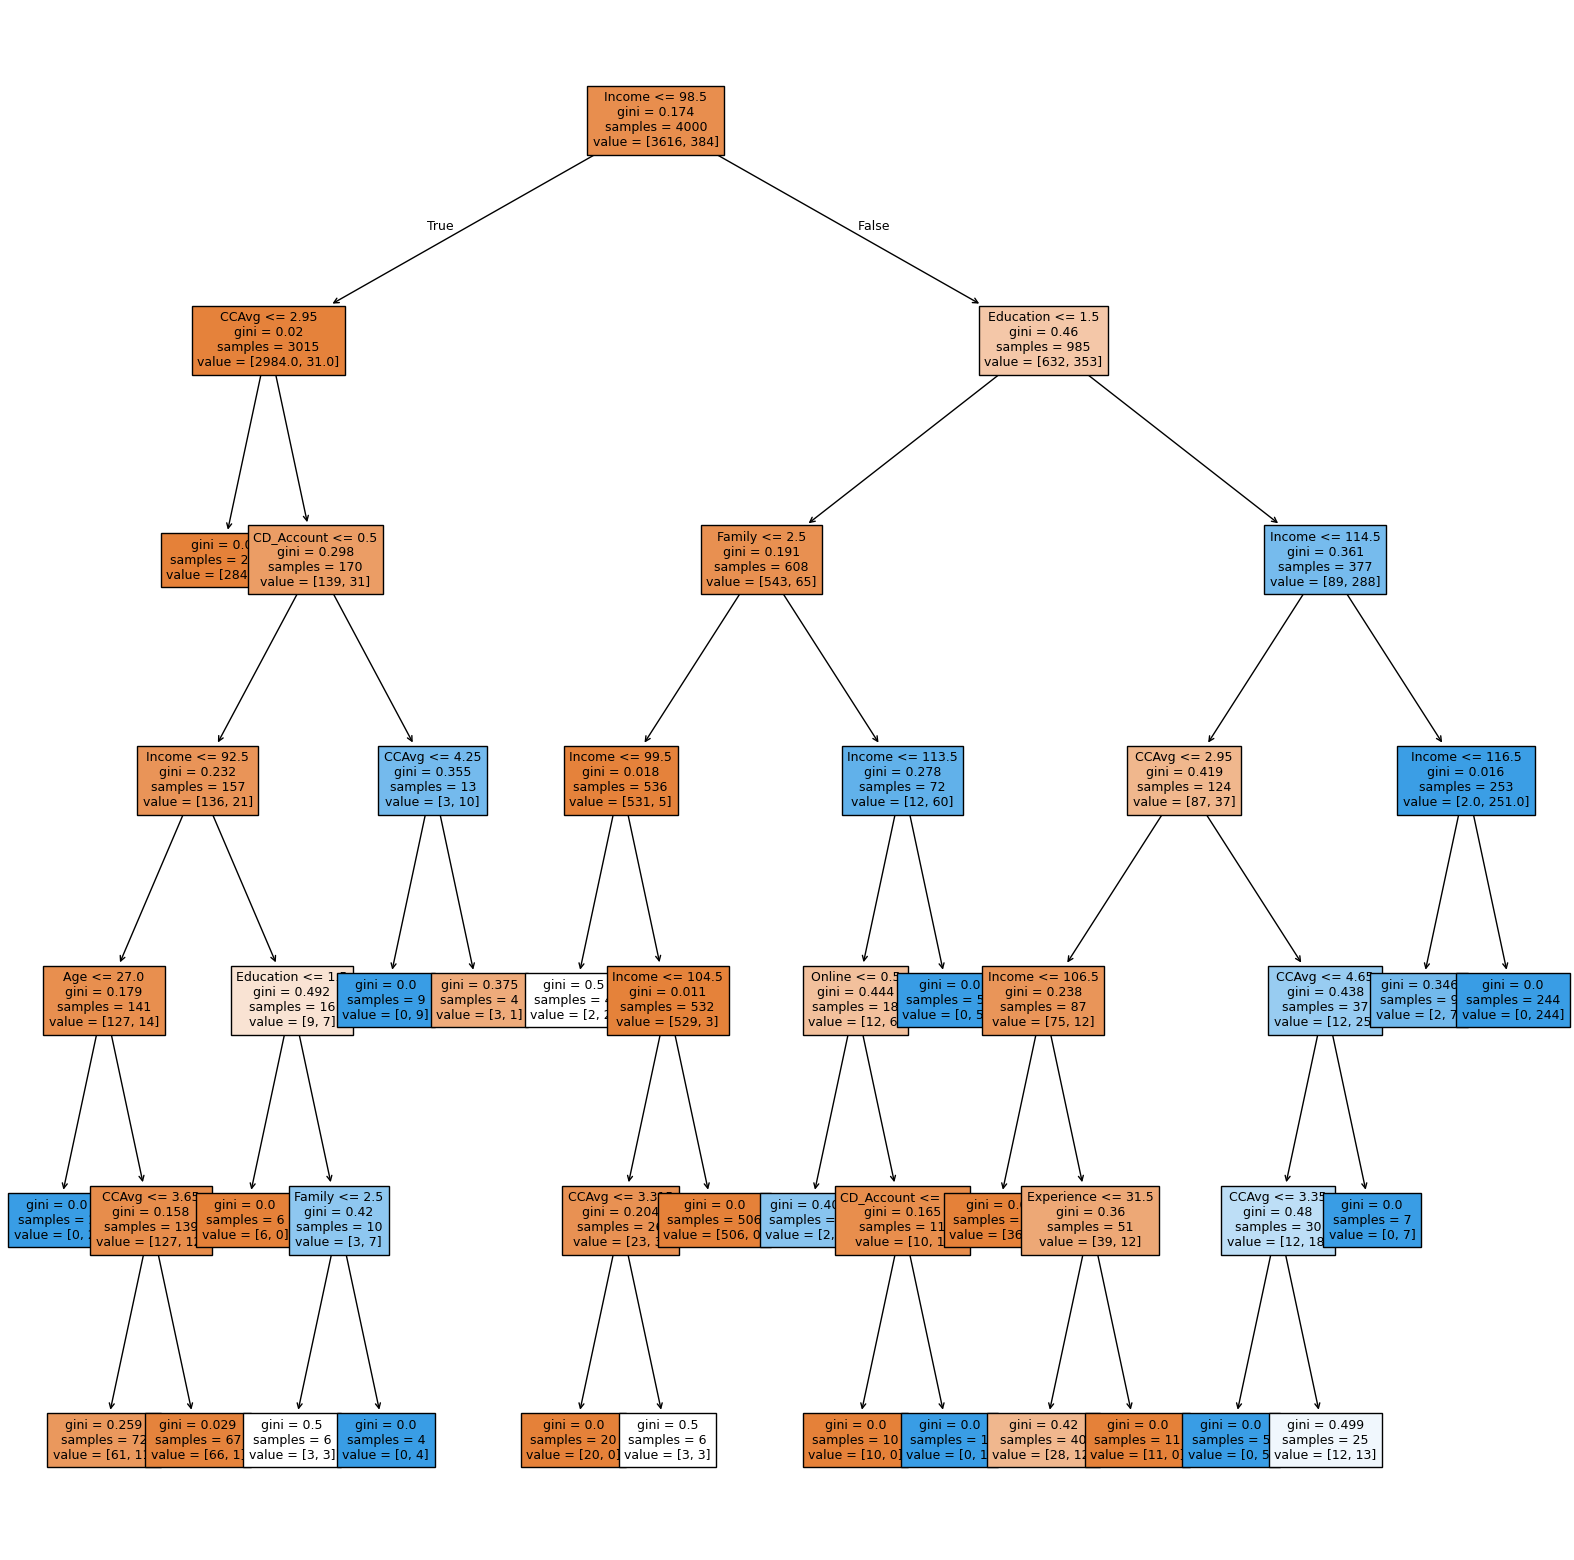

In [317]:
visualize_dtree(dtree2)

#### Observations
-  From the above it can be inferred that pre-pruning has made the complex tree a simplified version

#### Decision Tree (Post-Pruning)


In [318]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- weights: [61.00, 11.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.65
|   |   |   |   |   |   |--- weights: [66.00, 1.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |--- weights: [3.00, 3.00] class: 0
|   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.25
|   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |-

### Decision Tree (Post-Pruning)

In [319]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)#, class_weight='balanced')

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)
print(path)
# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

pd.DataFrame(path)

{'ccp_alphas': array([0.        , 0.00024359, 0.00024627, 0.0002963 , 0.00030636,
       0.0003307 , 0.00033333, 0.00033333, 0.00033333, 0.00035   ,
       0.00037289, 0.000375  , 0.00038095, 0.0004    , 0.0004    ,
       0.00041667, 0.00041943, 0.00045455, 0.00049257, 0.00054167,
       0.00054984, 0.00058418, 0.00065081, 0.00077885, 0.00082295,
       0.00083117, 0.00087029, 0.00242414, 0.0026671 , 0.003     ,
       0.00375337, 0.02002276, 0.02154881, 0.04760359]), 'impurities': array([0.        , 0.00048718, 0.00097972, 0.00186861, 0.00278768,
       0.00377977, 0.0041131 , 0.00444644, 0.00477977, 0.00582977,
       0.00732131, 0.00769631, 0.00807726, 0.00847726, 0.00927726,
       0.00969393, 0.01221049, 0.01266504, 0.01365018, 0.01473351,
       0.01693285, 0.01751703, 0.02077109, 0.02154993, 0.02237288,
       0.02320405, 0.02494463, 0.02736877, 0.03003587, 0.03303587,
       0.03678924, 0.056812  , 0.07836082, 0.173568  ])}


,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000244,0.000487
2,0.000246,0.000980
3,0.000296,0.001869
4,0.000306,0.002788
5,0.000331,0.003780
6,0.000333,0.004113
7,0.000333,0.004446
8,0.000333,0.004780
9,0.000350,0.005830


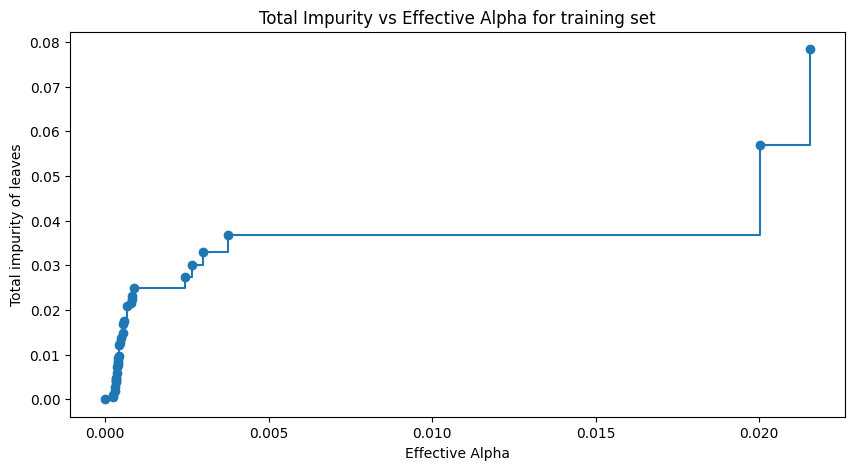

In [320]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [321]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)#, class_weight="balanced")

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815694


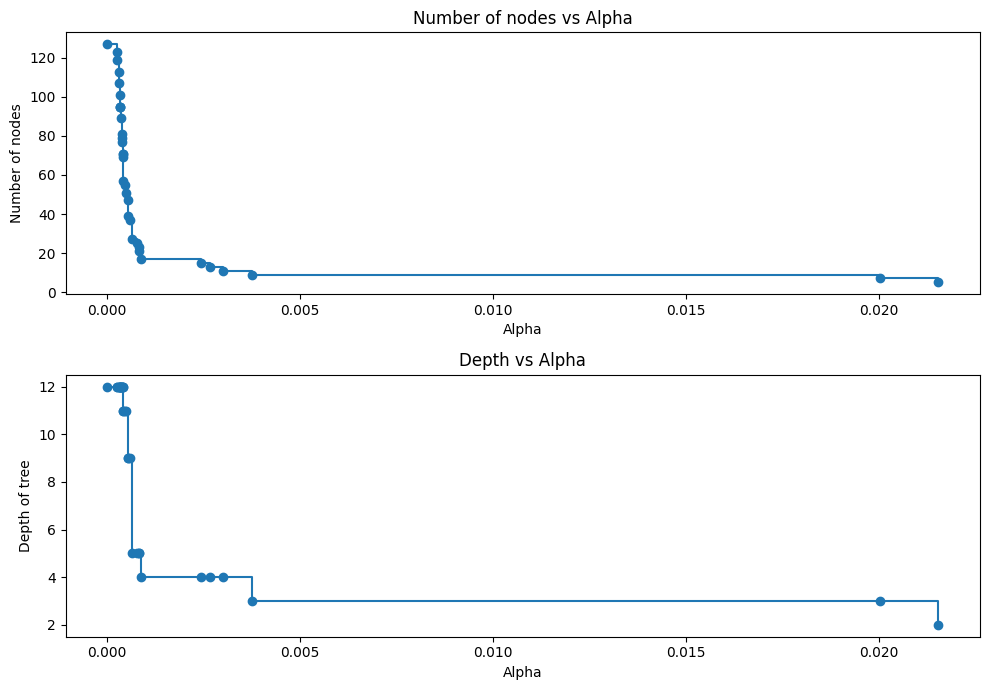

In [322]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [323]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [324]:

test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

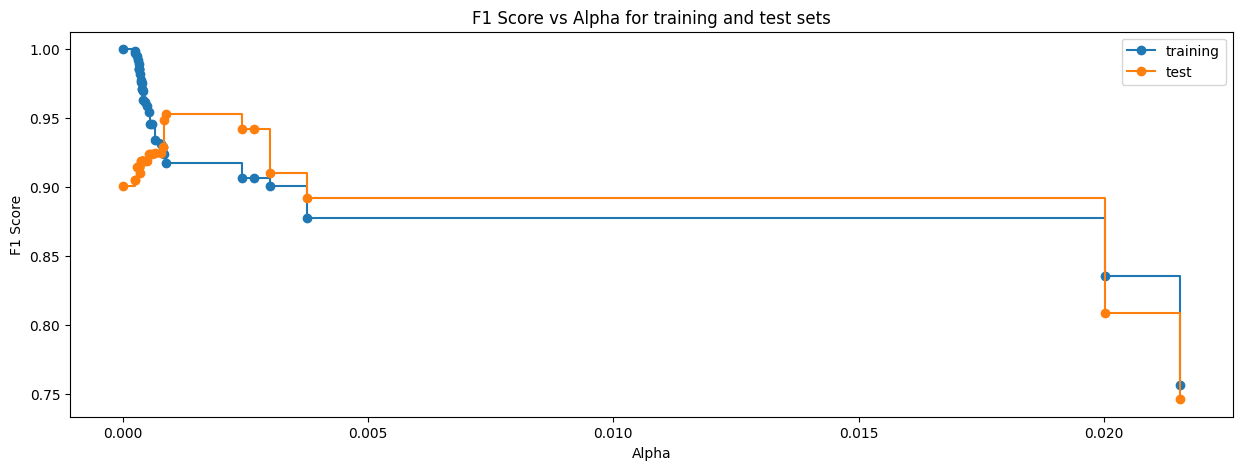

In [325]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [326]:

# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008702884311333967),
                       random_state=42)


#### Observations
- From post-pruning classification
  - dtree3 is created for post-pruning
  - F1 score = .95 is determined at the effective alpha of 0.0008
- The test data follows the train data

###Model Evaluation

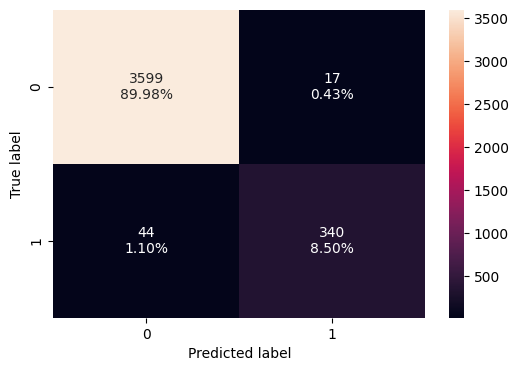

In [327]:

plot_confusion_matrix(dtree3, X_train, y_train)

In [328]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.98475,0.885417,0.952381,0.917679


#### Observations
- Post-pruning decision tree has
  - F1 score
    - Balanced weightage =
    - Normal weightage = 0.917
  - Recall
    - Balanced weightage =
    - Normal weightage = 0.885

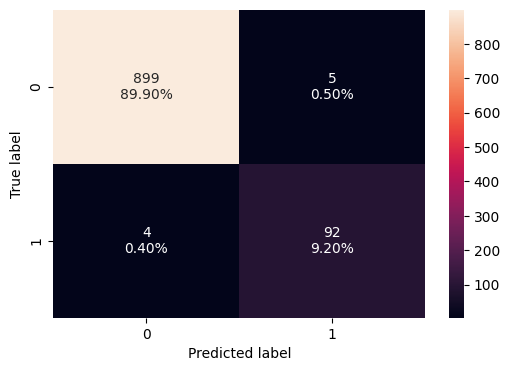

In [329]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [330]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.991,0.958333,0.948454,0.953368


#### Observations
- Post-pruning decision tree has
  - F1 score
    - Balanced weightage =
    - Normal weightage = 0.953
  - Recall
    - Balanced weightage =
    - Normal weightage = 0.958
- F1 and Recall scores are higher in test data compared to train data

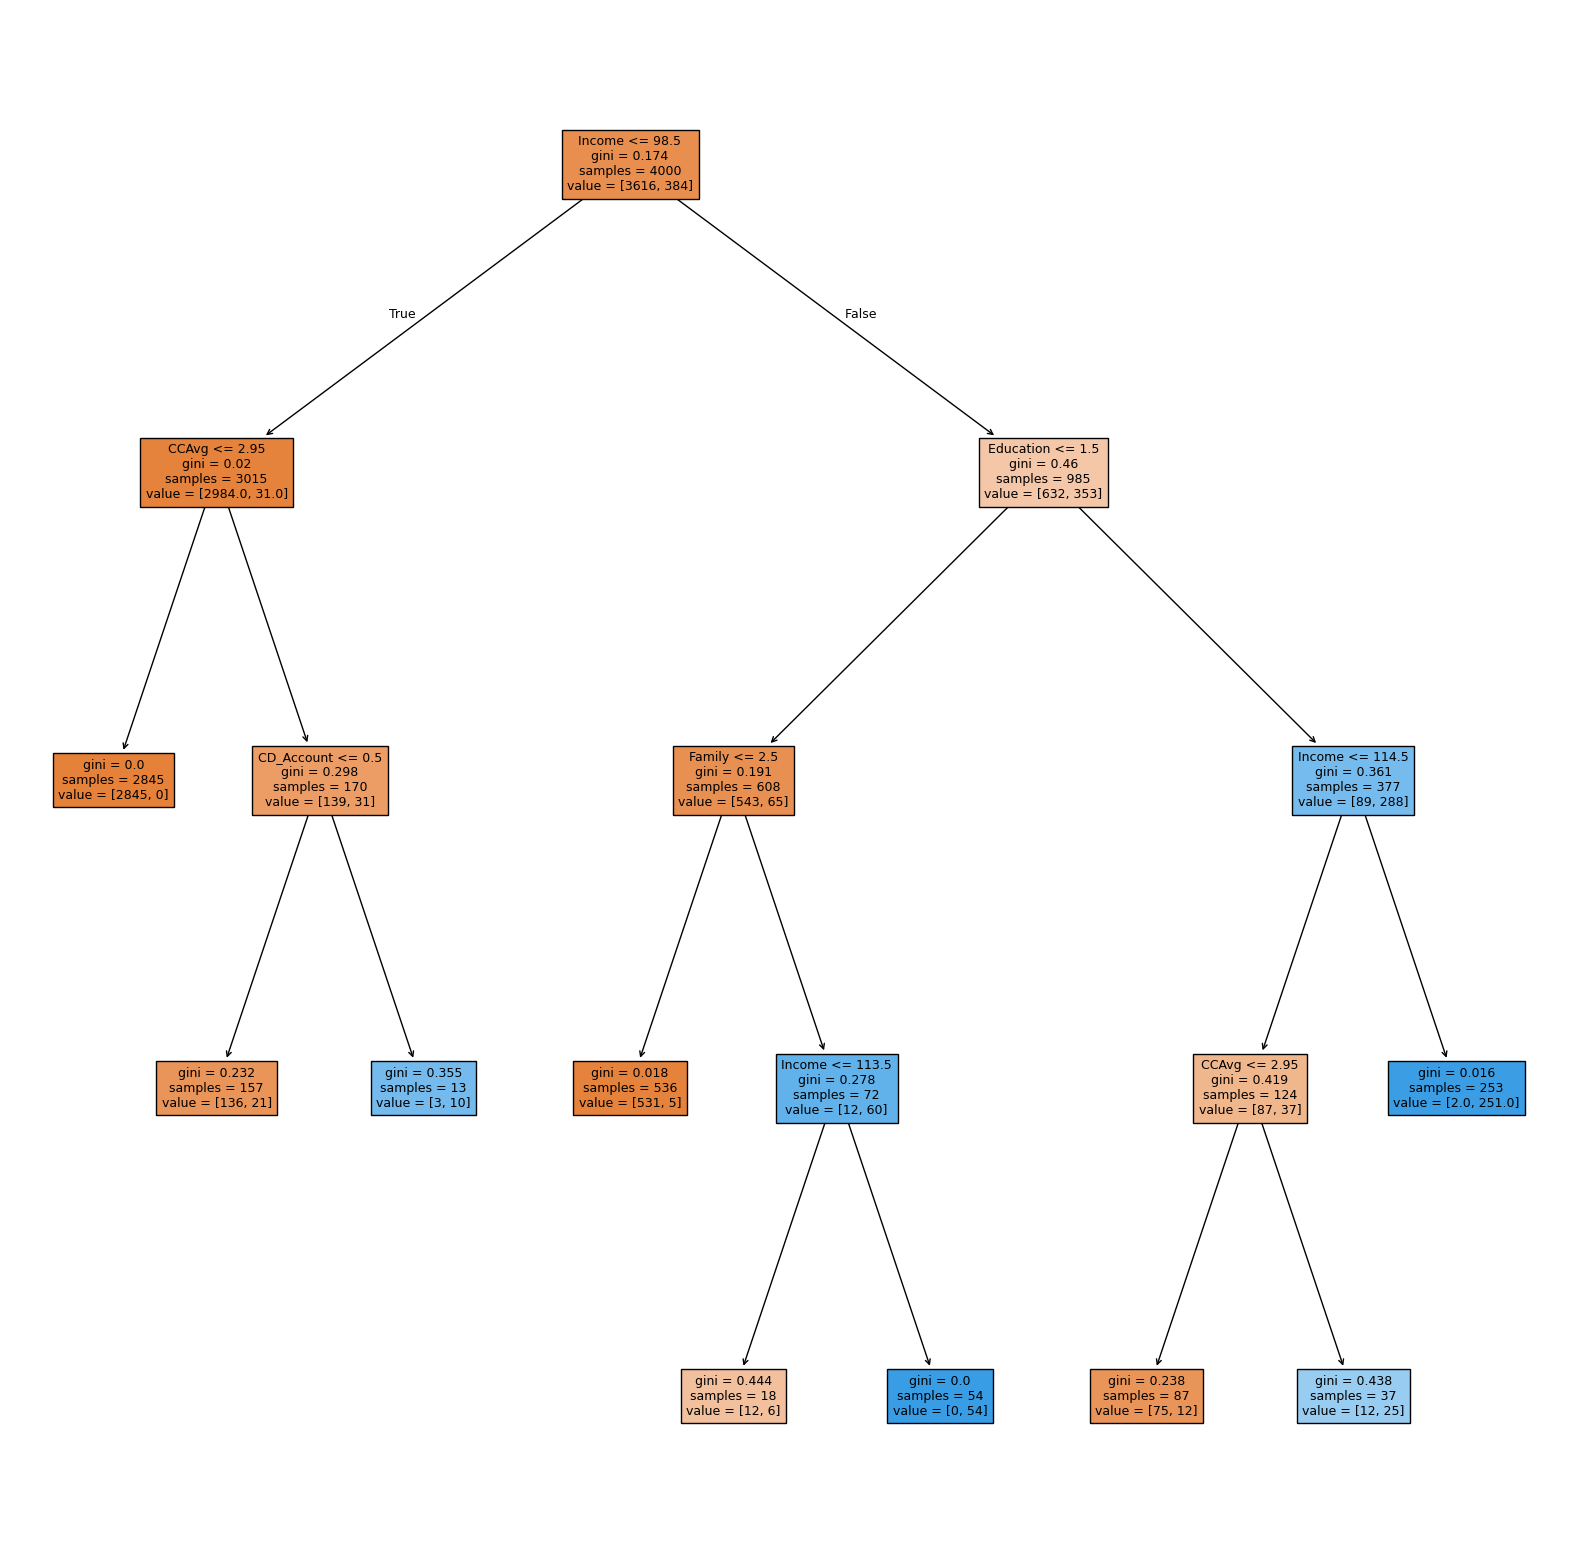

In [331]:
visualize_dtree(dtree3)

#### Observations
-  The post-pruning tree look a  lot simpler compared to pre-pruning
- But having simpler tree might not be correct prediction for edge cases
- Lets get the all the scores from pre & post pruning and compare to decide

In [332]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)


|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



## Model Performance Comparison and Final Model Selection

In [333]:

# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.987750,0.984750
Recall,1.0,0.914062,0.885417
Precision,1.0,0.956403,0.952381
F1,1.0,0.934754,0.917679


In [334]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.986000,0.991000
Recall,0.947917,0.958333,0.958333
Precision,0.858491,0.901961,0.948454
F1,0.900990,0.929293,0.953368


#### Observation
- Comparing scores pre and post pruning for Train data
  - Recall of post pruning has lower score than pre-pruning and this is important when not to miss positive customers
  - Post-pruning F1 scores are slightly lower than the pre-pruning
- Comparing scores pre and post pruning Test data
  - Recall is almost has the same score when not to miss positive customers
  - Post-pruning F1 scores are higer than the pre-pruning   

- Comparing Train Vs. Test data for scores
  - Comparing the results Post Pruning scores on test data has better classification

##### Decision Tree Final:
- Post Pruning
    - Post Pruning proves to be obvious choice for this classification of customer for buying loan


### Feature Importance

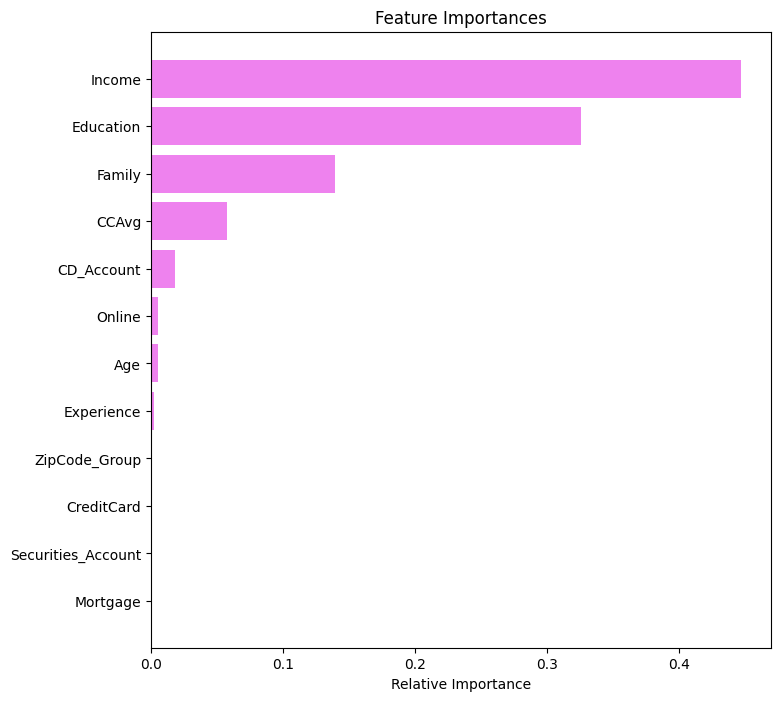

In [335]:

# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

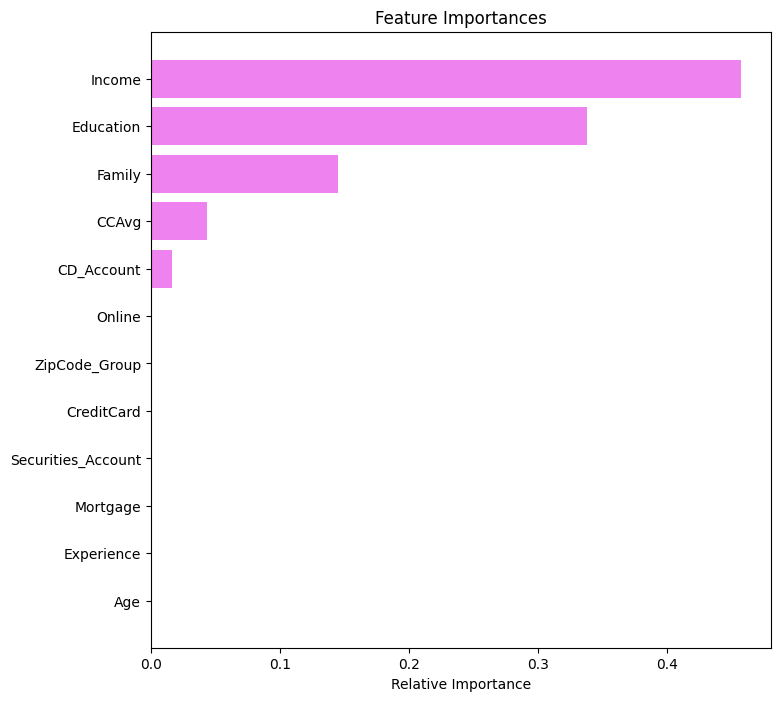

In [339]:
# importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
- Compare Post Vs. Pre Pruning
  - Both prune data similarly with Income Education Family are chosen  
- Income is the most important criteria for classifying customers for buying personal loan and Income greteer than 98.5 is chosen by the decision tree to classify the customers that are for sure to buy a loan
- Next comes Education and Family
  - Education of 1.5 average is taken for classifying customer for buying loan
  - Family of 2.5 average member is classified for buying loan

In [351]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction_pre_pru = dtree2.predict(applicant_details)

print(approval_prediction_pre_pru)


[0]
CPU times: user 2.98 ms, sys: 1.03 ms, total: 4.01 ms
Wall time: 3.95 ms


In [348]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction_post_pru = dtree3.predict(applicant_details)

print(approval_prediction_post_pru)

[0]
CPU times: user 2.92 ms, sys: 1.03 ms, total: 3.94 ms
Wall time: 3.83 ms


#### Observations
- Comparing speed between pre and post pruning
  - PostPruning is faster
    - usually post-pruning will be slightly slower has it has to fully grow a tree and then prun , but there the Post Pruning is faster in execution

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?
  - For this model Post-Pruning is chosen to be the opt method for classifying the customer
    - Class weightage is normal and balanced weightage is not chosen
      - Reason for not making class weightage as balanced is that we wanted to predict the customer based on the given data and if weightage is balanced we might not be able to identify the influencing factor that determines the potential customer for buying loan
  - The model built can classify a customer for buying a loan and correctly identify 95% of customers . Also it can predict the positive customers 95% (potential customers that might have been a false negative)
  - Influencing factors & Recommendations
    - Income, Education, Family
    - Look for these criteria on new applications for buying a new loan
    - Factors and values
      - from below we can see that Income criteria above 98.5 has more weights
      - take a look at potential loss of customers where class:1 is hilted in green
        - there is a possibilty that these customers can be approached for buying a loan.
        - total of 3 + 12 + 2 = 17 customers can be approached for loan

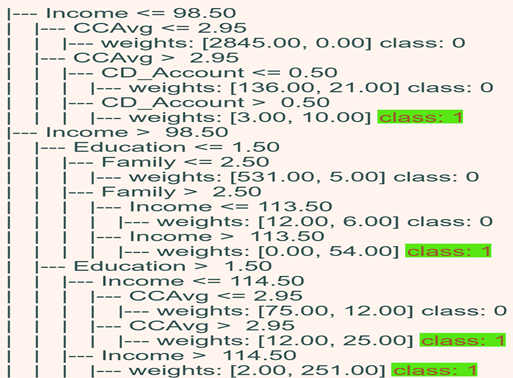